In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
from IPython.core.debugger import set_trace

# Import Packages

In [2]:
from __future__ import print_function
# IMPORT PACKAGES
import warnings
warnings.filterwarnings('ignore')
import os, glob, sys, inspect
import time
from datetime import datetime
import warnings, logging
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import butter, lfilter, freqz
from scipy.optimize import minimize
from scipy import optimize
from sklearn.cluster import KMeans
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.mixture import GaussianMixture as GMM
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
import itertools as it
from matplotlib.gridspec import GridSpec
from sklearn.mixture import GaussianMixture as GMM
# 
from sklearn.metrics import mean_absolute_error, mean_squared_error
# IMPORT CUSTOM PACKAGES
# parent_dir = os.path.abspath(os.path.join(os.path.abspath(''), os.path.pardir))
curr_dir = os.getcwd()
parent_dir,_ = os.path.split(curr_dir)
sys.path.append(parent_dir)
from utils import get_varargin
import utils, blob_utils, df_utils
from Classes import FileStorageIOClass
from Classes.Utilities import CloudSetup
from Classes.FileStorageIOClass import FileStorageIO
from Classes import config

# Package config
# Logging config
logger = logging.getLogger()
stream_hdl = logging.StreamHandler(sys.stdout)
formatter = logging.Formatter('%(asctime)s | %(filename)s - %(levelname)s - %(message)s',
                             datefmt='%Y%m%d-%I:%M')
stream_hdl.setFormatter(formatter)
logger.setLevel(logging.INFO)
logger.addHandler(stream_hdl)
# Only keep one logger
for h in logger.handlers[:-1]: 
    logger.removeHandler(h)
# Local Blob to store data
local = blob_utils.local_setup()

In [3]:
from CycleFramework.analytics import DrillingOperations as drill_op

# Import Data

In [5]:
filename = 'df_avg_data10.csv'
sel_dir = local['winsorized_Data']
df = df_utils.load_df(os.path.join(sel_dir, filename))

20190923-09:40 | df_utils.py - INFO - Pandas read: C:\Users\212769892\Desktop\OFS_DATA\AzureEmulator\winsorized_Data\df_avg_data10.csv
20190923-09:40 | df_utils.py - INFO - DONE: load_df


Shape (nb_rows x nb_cols): (29824, 219)


,Unnamed: 0,Unnamed: 0.1,-ROP-,Bit_rpm2,Bit_rpm2_max,Bit_rpm2_min,CoP_Err,Cum_Seconds_Epoch,DH_Torque_adapted_CoPi,DH_Torque_adapted_Surf,...,t2,t_avg,t_diff,wellname,wob_adapted_dh,wob_adapted_surf,wob_corr_dt,wob_max,wob_min,bit_dia
0,0,0,0.079144,94.540868,95.155727,93.915146,0.023707,1.423776e+09,2.440689,4.998709,...,453242.0,226621.0,175.388622,NO_30_6_C_08_DT2,11.078605,14.971995,17.581604,17.888907,17.313292,8.5
1,1,1,13.835887,137.796704,138.724978,136.845224,0.176359,1.424181e+09,4.241540,7.065004,...,455824.0,454533.0,2.817496,NO_30_6_C_08_DT2,14.126819,17.147988,20.913651,21.658591,20.219966,8.5
2,2,2,13.290889,152.892305,153.947758,151.803498,0.083409,1.424183e+09,4.744056,8.973661,...,458528.0,457176.0,2.811475,NO_30_6_C_08_DT2,4.316150,3.242016,5.065800,6.190118,4.133534,8.5
3,3,3,56.904885,161.404625,162.640897,159.999607,0.000000,1.424186e+09,5.229184,9.480031,...,459158.0,458843.0,2.796460,NO_30_6_C_08_DT2,0.083473,0.981462,1.932120,2.708626,1.863859,8.5
4,4,4,11.905538,153.171883,154.190737,152.196065,0.000000,1.424187e+09,5.724562,7.386172,...,462163.0,460660.5,2.809446,NO_30_6_C_08_DT2,8.972027,12.936718,16.619639,17.395127,16.033017,8.5


Number of columns: 219


['-ROP-',
 'Bit_rpm2',
 'Bit_rpm2_max',
 'Bit_rpm2_min',
 'CoP_Err',
 'Cum_Seconds_Epoch',
 'DH_Torque_adapted_CoPi',
 'DH_Torque_adapted_Surf',
 'DLS',
 'DownHole_Torque',
 'DownHole_Torque_ave',
 'DownHole_Torque_offset',
 'DrillString_Torque_max',
 'DrillString_Torque_min',
 'DrillString_rpm',
 'DrillString_torque',
 'Es',
 'Es_est',
 'Es_krig',
 'Flag_Drilling',
 'HCCI',
 'I_BITAGG',
 'Ih_last',
 'Impact_force_hyd',
 'Inclination',
 'MSE',
 'MudTemperature_In',
 'MudTemperature_Out',
 'MudWeight_In',
 'MudWeight_In_Annulus',
 'MudWeight_Out',
 'Mudmotor_rpm',
 'PumpFlow_gpm',
 'Pumpflow_out',
 'Pumpflow_out_pcent',
 'ROP_Calc',
 'ROP_Calc/SSLIPDX2',
 'ROP_Calc/SSLIPDX3',
 'ROP_per_RPM',
 'ROP_wNDT',
 'Run_Number',
 'SEVTDR_shifted',
 'SEVXYDR_shifted',
 'SEVXYDX',
 'SEVXYDX_perc_ge_1',
 'SEVXYDX_perc_ge_2',
 'SEVXYDX_perc_ge_3',
 'SEVXYDX_perc_ge_4',
 'SEVXYDX_perc_ge_5',
 'SEVXYDX_perc_ge_6',
 'SEVXYDX_perc_ge_7',
 'SEVXYX',
 'SEVZDR_shifted',
 'SEVZDX',
 'SEVZDX_perc_ge_1',
 'SEV

C:\Users\212769892\Documents\bhge_dev\src\luu_dev\df_utils.py:140: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  nan_df.iloc[-topk:].plot(y='percent_missing', kind = 'barh', ax = fig.add_subplot(111))


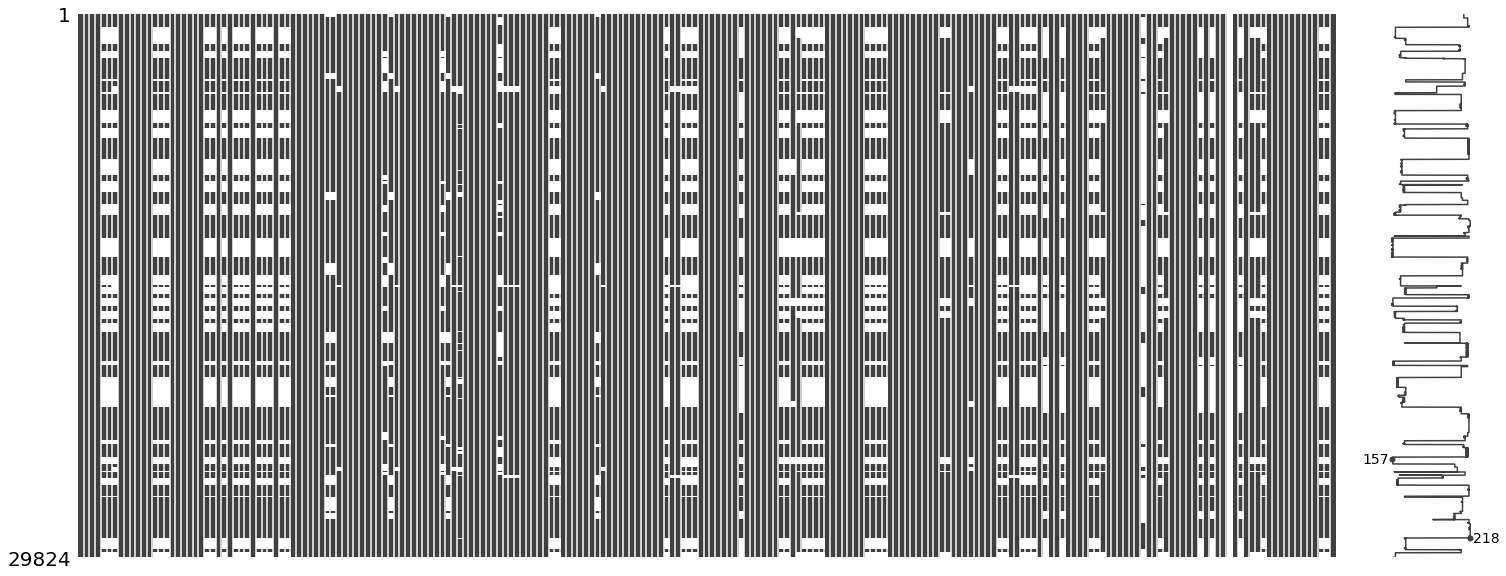

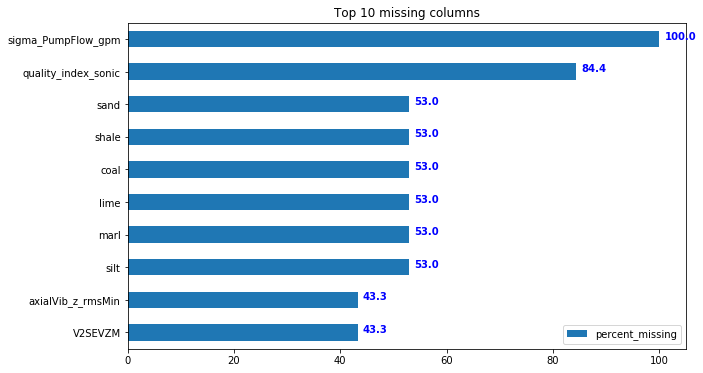

Continuous Data Cols:


['-ROP-',
 'Bit_rpm2',
 'Bit_rpm2_max',
 'Bit_rpm2_min',
 'CoP_Err',
 'Cum_Seconds_Epoch',
 'DH_Torque_adapted_CoPi',
 'DH_Torque_adapted_Surf',
 'DLS',
 'DownHole_Torque',
 'DownHole_Torque_ave',
 'DownHole_Torque_offset',
 'DrillString_Torque_max',
 'DrillString_Torque_min',
 'DrillString_rpm',
 'DrillString_torque',
 'Es',
 'Es_est',
 'Es_krig',
 'Flag_Drilling',
 'HCCI',
 'I_BITAGG',
 'Ih_last',
 'Impact_force_hyd',
 'Inclination',
 'MSE',
 'MudTemperature_In',
 'MudTemperature_Out',
 'MudWeight_In',
 'MudWeight_In_Annulus',
 'MudWeight_Out',
 'Mudmotor_rpm',
 'PumpFlow_gpm',
 'Pumpflow_out',
 'Pumpflow_out_pcent',
 'ROP_Calc',
 'ROP_Calc/SSLIPDX2',
 'ROP_Calc/SSLIPDX3',
 'ROP_per_RPM',
 'ROP_wNDT',
 'Run_Number',
 'SEVTDR_shifted',
 'SEVXYDR_shifted',
 'SEVXYDX',
 'SEVXYDX_perc_ge_1',
 'SEVXYDX_perc_ge_2',
 'SEVXYDX_perc_ge_3',
 'SEVXYDX_perc_ge_4',
 'SEVXYDX_perc_ge_5',
 'SEVXYDX_perc_ge_6',
 'SEVXYDX_perc_ge_7',
 'SEVXYX',
 'SEVZDR_shifted',
 'SEVZDX',
 'SEVZDX_perc_ge_1',
 'SEV

Category Data Cols: 


['Unnamed: 0',
 'Unnamed: 0.1',
 'filename',
 'formation',
 'i1',
 'i2',
 'len_df',
 'run',
 'wellname']

In [6]:
df_utils.show_df_stat(df)

In [30]:
%autoreload 2

In [32]:
df_utils.list_df_columns(df, or_key = ['cutter', 'wear', 'wo','mix'])

['Wo_act',
 'Wo_est',
 'cutter_wear_area',
 'dWo',
 'dwob',
 'dwob_ave',
 'dwob_offset',
 'quality_index_dwob',
 'quality_index_wob',
 'sigma_wob',
 'wob_adapted_dh',
 'wob_adapted_surf',
 'wob_corr_dt',
 'wob_max',
 'wob_min']

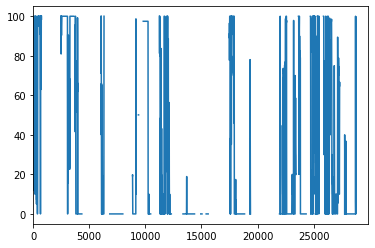

In [8]:
df['shale'].plot()

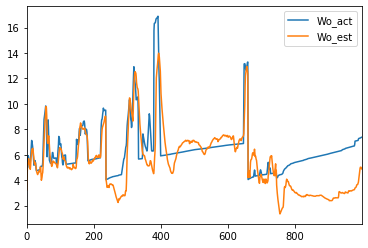

In [27]:
df[['Wo_act', 'Wo_est']].iloc[:1000].plot()

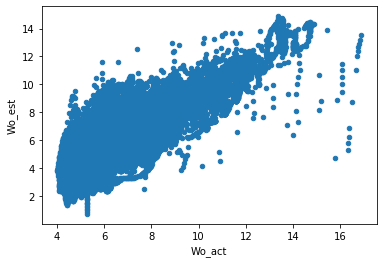

In [10]:
df.plot(x = 'Wo_act', y = 'Wo_est', kind = 'scatter')

In [39]:
a=np.array([1, 2, 3])
b = np.array([2,2,2])
print(a)
print(b)
print(a*b)

[1 2 3]
[2 2 2]
[2 4 6]


In [12]:
default_lith_list = ['shale', 'silt', 'coal', 'marl', 'lime', 'sand']
# Check if the lith_list are in the df DataFrame
avai_lith_list = list(set(default_lith_list).intersection(set(df.columns.to_list())))
print(avai_lith_list)

['sand', 'silt', 'lime', 'coal', 'shale', 'marl']


In [50]:
lith_coef_dict={'marl': 30.0, 
                'coal': 5.0, 
                'shale': 9.1, 
                'silt': 15, 
                'lime': 63.3,
                'sand': 31.0}
list(lith_coef_dict.values())
list(lith_coef_dict.keys())

['marl', 'coal', 'shale', 'silt', 'lime', 'sand']

# Objective Function

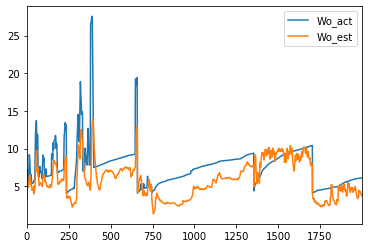

In [86]:
def compute_wo(lith_coef_dict, df):
    df_wo = df[avai_lith_list + ['Wo_est', 'a', 'cutter_wear_area']]
    lith_list = list(lith_coef_dict.keys())
    lith_coef_val = list(lith_coef_dict.values())
    lith_coef = np.array([])
    for idx, row in df_wo.iterrows():
        lith_row = row[lith_list].values
        check = lith_row * lith_coef_val
        check[check == 0] = np.mean(check)
        sum_row = np.sum(lith_row)
        if sum_row == 0: sum_row == 100
        lith_coef = np.append(lith_coef, np.sum(check/sum_row))
    df_wo['lith_coef'] = lith_coef
    df_wo.lith_coef.fillna(df_wo.lith_coef.mean(), inplace = True)
    Wo_act = df_wo.a * df_wo.lith_coef * np.sqrt(df_wo.cutter_wear_area) + 4
    df_wo['Wo_act'] = Wo_act
    return df_wo

def Wo_obj_func(lith_coef_val, df):
    lith_list = ['marl', 'coal', 'shale', 'silt', 'lime', 'sand']
    lith_coef_dict = dict(zip(lith_list, lith_coef_val))
    df_wo = compute_wo(lith_coef_dict, df)
    mse = mean_squared_error(df_wo['Wo_act'].values, df_wo['Wo_est'].values)
    return mse

lith_coef_val = [30.0, 5.0, 9.1, 15.0, 63.3, 31.0]
lith_list = ['marl', 'coal', 'shale', 'silt', 'lime', 'sand']
lith_coef_dict = dict(zip(lith_list, lith_coef_val))
df_wo = compute_wo(lith_coef_dict,df.iloc[:2000])
df_wo[['Wo_act', 'Wo_est']].plot()
# Wo_obj_func(lith_coef_val, df)

## Lith_Coef Optimization

In [98]:
lith_coef_init = [30.0, 5.0, 9.1, 15.0, 63.3, 31.0]
disp = True
optimization_Obj = minimize(Wo_obj_func, lith_coef_init, args=(df.iloc[:1000]), method='SLSQP',
                            bounds = [(0.0,100.0)]*len(lith_coef_init),
                            options = {'maxiter': 100, 'disp': disp})
print(optimization_Obj.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.4064187974225533
            Iterations: 20
            Function evaluations: 160
            Gradient evaluations: 20
[30.        5.        5.146925 15.       22.621503 14.786531]


In [99]:
lith_coef_val = optimization_Obj.x
lith_coef_val_lit = [30.0, 5.0, 9.1, 15.0, 63.3, 31.0]
lith_list = ['marl', 'coal', 'shale', 'silt', 'lime', 'sand']
lith_coef_dict = dict(zip(lith_list, lith_coef_val))
df_wo = compute_wo(lith_coef_dict,df.iloc[:1000])

lith_coef_dict = dict(zip(lith_list, lith_coef_val_lit))
df_wo_lit = compute_wo(lith_coef_dict,df.iloc[:1000])
df_wo['Wo_act_opt'] = df_wo['Wo_act']
df_wo['Wo_act_lit'] = df_wo_lit['Wo_act']

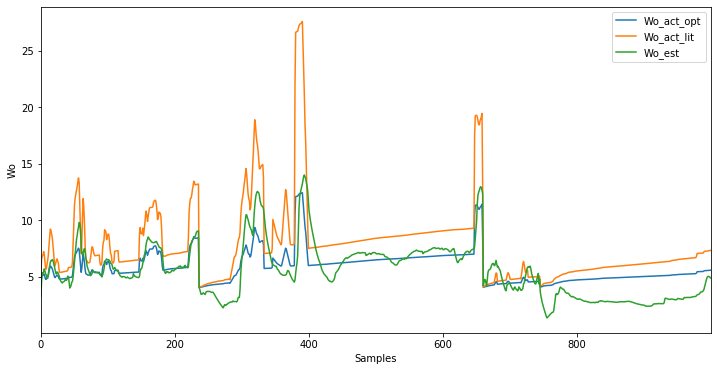

In [103]:
fig = plt.figure(figsize = (12,6))
df_wo[['Wo_act_opt', 'Wo_act_lit', 'Wo_est']].plot(ax = fig.add_subplot(111))
plt.xlabel('Samples')
plt.ylabel('Wo')
fig.savefig('images/{}-Wo_Lith_Coefficients.png'.format(datetime.today().strftime('%Y%m%d'), 
                                                        dpi = 500, 
                                                        bbox_inches = 'tight'))

In [105]:
from VirtualMudlog import lith1lith2_ml1

# Compute Lith1, lith2

In [109]:
input_df = df
df_model = lith1lith2_ml1.build_model_dict_ml1(input_df)

20190923-01:34 | lith1lith2_ml1.py - INFO - Running: build_model_dict_ml1
20190923-01:34 | lith1lith2_ml1.py - INFO - Processing formation : BRENT GP. OSB_M Top. 1/18
20190923-01:34 | lith1lith2_ml1.py - INFO - ...shale. 1/6
20190923-01:34 | lith1lith2_ml1.py - INFO - ...silt. 2/6
20190923-01:34 | lith1lith2_ml1.py - INFO - ...coal. 3/6
20190923-01:34 | lith1lith2_ml1.py - INFO - ...marl. 4/6
20190923-01:34 | lith1lith2_ml1.py - INFO - ...lime. 5/6
20190923-01:34 | lith1lith2_ml1.py - INFO - ...sand. 6/6
20190923-01:34 | lith1lith2_ml1.py - INFO - Processing formation : CROMER KNOLL GP. Top. 2/18
20190923-01:34 | lith1lith2_ml1.py - INFO - ...shale. 1/6
20190923-01:34 | lith1lith2_ml1.py - INFO - ...silt. 2/6
20190923-01:34 | lith1lith2_ml1.py - INFO - ...coal. 3/6
20190923-01:34 | lith1lith2_ml1.py - INFO - ...marl. 4/6
20190923-01:34 | lith1lith2_ml1.py - INFO - ...lime. 5/6
20190923-01:34 | lith1lith2_ml1.py - INFO - ...sand. 6/6
20190923-01:34 | lith1lith2_ml1.py - INFO - Processin

In [110]:
df_lith1lith2 = lith1lith2_ml1.df_apply_model_dict_ml1(input_df, df_model)

20190923-01:35 | lith1lith2_ml1.py - INFO - Running: df_apply_model_dict_ml1
20190923-01:35 | lith1lith2_ml1.py - INFO - Apply model for: shale. 1/6
20190923-01:35 | lith1lith2_ml1.py - INFO - ...Formation: SHETLAND GP. Top. Model code: 1. Progress: 0.0%
20190923-01:35 | lith1lith2_ml1.py - INFO - ...Formation: SHETLAND GP. Top. Model code: 1. Progress: 20.0%
20190923-01:35 | lith1lith2_ml1.py - INFO - ...Formation: VIKING GP. Top. Model code: 1. Progress: 40.0%
20190923-01:35 | lith1lith2_ml1.py - INFO - ...Formation: CROMER KNOLL GP. Top. Model code: 1. Progress: 60.0%
20190923-01:35 | lith1lith2_ml1.py - INFO - ...Formation: Ness Fm. OSB_M Top. Model code: 1. Progress: 80.0%
20190923-01:35 | lith1lith2_ml1.py - INFO - ...Formation: Ness Fm. OSB_M Top. Model code: 1. Progress: 100.0%
20190923-01:35 | lith1lith2_ml1.py - INFO - Apply model for: silt. 2/6
20190923-01:35 | lith1lith2_ml1.py - INFO - ...Formation: SHETLAND GP. Top. Model code: 1. Progress: 0.0%
20190923-01:35 | lith1lith

In [111]:
df_lith1lith2 = lith1lith2_ml1.df_compute_lith1lith2_ml1(df_lith1lith2)

20190923-01:36 | lith1lith2_ml1.py - INFO - Running: df_compute_lith1lith2_ml1
20190923-01:37 | lith1lith2_ml1.py - INFO - DONE: df_compute_lith1lith2_ml1


Shape (nb_rows x nb_cols): (29824, 230)


,Unnamed: 0,Unnamed: 0.1,-ROP-,Bit_rpm2,Bit_rpm2_max,Bit_rpm2_min,CoP_Err,Cum_Seconds_Epoch,DH_Torque_adapted_CoPi,DH_Torque_adapted_Surf,...,shale_predicted,silt_predicted,coal_predicted,marl_predicted,lime_predicted,sand_predicted,Lith1_ML1,Lith1_perc_ML1,Lith2_ML1,Lith2_perc_ML1
0,0,0,0.079144,94.540868,95.155727,93.915146,0.023707,1.423776e+09,2.440689,4.998709,...,78.6453,0.0,0.0,0.0,6.493712,0.0,shale,78.6453,lime,21.3547
1,1,1,13.835887,137.796704,138.724978,136.845224,0.176359,1.424181e+09,4.241540,7.065004,...,0.0000,0.0,0.0,0.0,0.000000,0.0,sand,NaN,lime,NaN
2,2,2,13.290889,152.892305,153.947758,151.803498,0.083409,1.424183e+09,4.744056,8.973661,...,0.0000,0.0,0.0,0.0,0.000000,0.0,sand,NaN,lime,NaN
3,3,3,56.904885,161.404625,162.640897,159.999607,0.000000,1.424186e+09,5.229184,9.480031,...,0.0000,0.0,0.0,0.0,0.000000,0.0,sand,NaN,lime,NaN
4,4,4,11.905538,153.171883,154.190737,152.196065,0.000000,1.424187e+09,5.724562,7.386172,...,0.0000,0.0,0.0,0.0,0.000000,0.0,sand,NaN,lime,NaN


Number of columns: 230


['-ROP-',
 'Bit_rpm2',
 'Bit_rpm2_max',
 'Bit_rpm2_min',
 'CoP_Err',
 'Cum_Seconds_Epoch',
 'DH_Torque_adapted_CoPi',
 'DH_Torque_adapted_Surf',
 'DLS',
 'DownHole_Torque',
 'DownHole_Torque_ave',
 'DownHole_Torque_offset',
 'DrillString_Torque_max',
 'DrillString_Torque_min',
 'DrillString_rpm',
 'DrillString_torque',
 'Es',
 'Es_est',
 'Es_krig',
 'Flag_Drilling',
 'HCCI',
 'I_BITAGG',
 'Ih_last',
 'Impact_force_hyd',
 'Inclination',
 'Lith1_ML1',
 'Lith1_perc_ML1',
 'Lith2_ML1',
 'Lith2_perc_ML1',
 'MSE',
 'MudTemperature_In',
 'MudTemperature_Out',
 'MudWeight_In',
 'MudWeight_In_Annulus',
 'MudWeight_Out',
 'Mudmotor_rpm',
 'PumpFlow_gpm',
 'Pumpflow_out',
 'Pumpflow_out_pcent',
 'ROP_Calc',
 'ROP_Calc/SSLIPDX2',
 'ROP_Calc/SSLIPDX3',
 'ROP_per_RPM',
 'ROP_wNDT',
 'Run_Number',
 'SEVTDR_shifted',
 'SEVXYDR_shifted',
 'SEVXYDX',
 'SEVXYDX_perc_ge_1',
 'SEVXYDX_perc_ge_2',
 'SEVXYDX_perc_ge_3',
 'SEVXYDX_perc_ge_4',
 'SEVXYDX_perc_ge_5',
 'SEVXYDX_perc_ge_6',
 'SEVXYDX_perc_ge_7',
 

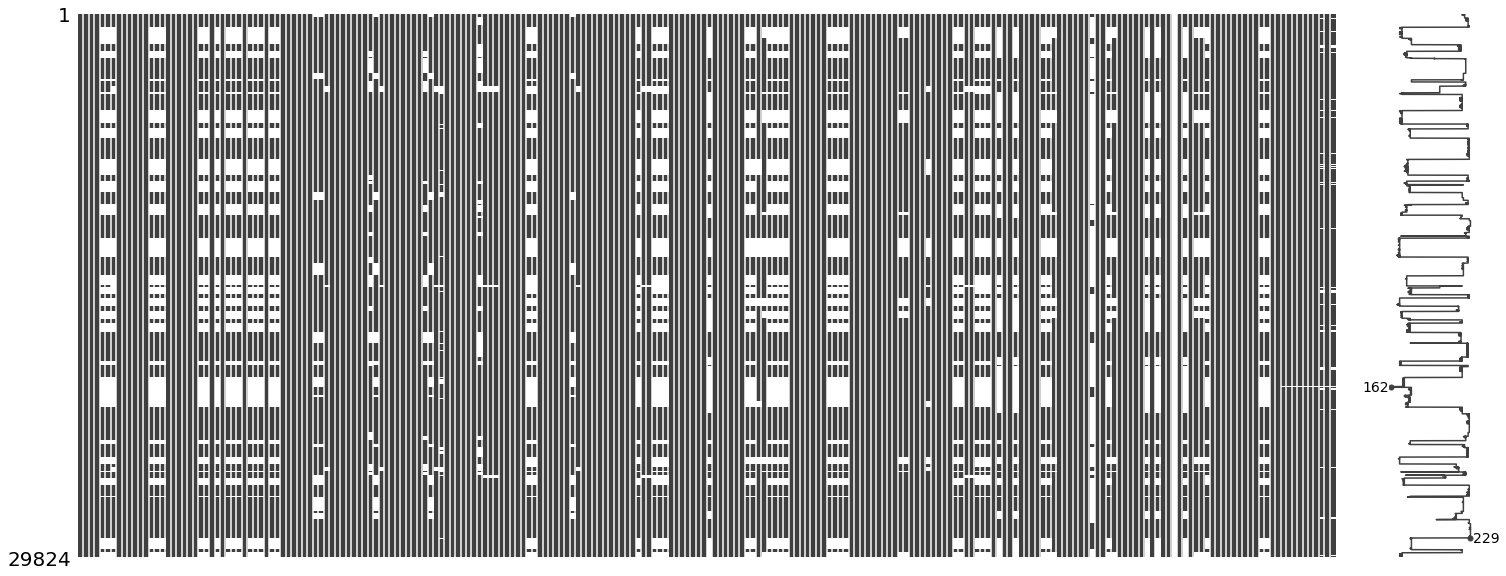

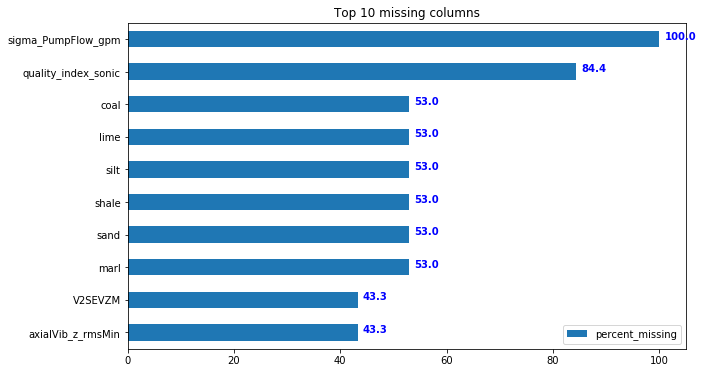

Continuous Data Cols:


['-ROP-',
 'Bit_rpm2',
 'Bit_rpm2_max',
 'Bit_rpm2_min',
 'CoP_Err',
 'Cum_Seconds_Epoch',
 'DH_Torque_adapted_CoPi',
 'DH_Torque_adapted_Surf',
 'DLS',
 'DownHole_Torque',
 'DownHole_Torque_ave',
 'DownHole_Torque_offset',
 'DrillString_Torque_max',
 'DrillString_Torque_min',
 'DrillString_rpm',
 'DrillString_torque',
 'Es',
 'Es_est',
 'Es_krig',
 'Flag_Drilling',
 'HCCI',
 'I_BITAGG',
 'Ih_last',
 'Impact_force_hyd',
 'Inclination',
 'MSE',
 'MudTemperature_In',
 'MudTemperature_Out',
 'MudWeight_In',
 'MudWeight_In_Annulus',
 'MudWeight_Out',
 'Mudmotor_rpm',
 'PumpFlow_gpm',
 'Pumpflow_out',
 'Pumpflow_out_pcent',
 'ROP_Calc',
 'ROP_Calc/SSLIPDX2',
 'ROP_Calc/SSLIPDX3',
 'ROP_per_RPM',
 'ROP_wNDT',
 'Run_Number',
 'SEVTDR_shifted',
 'SEVXYDR_shifted',
 'SEVXYDX',
 'SEVXYDX_perc_ge_1',
 'SEVXYDX_perc_ge_2',
 'SEVXYDX_perc_ge_3',
 'SEVXYDX_perc_ge_4',
 'SEVXYDX_perc_ge_5',
 'SEVXYDX_perc_ge_6',
 'SEVXYDX_perc_ge_7',
 'SEVXYX',
 'SEVZDR_shifted',
 'SEVZDX',
 'SEVZDX_perc_ge_1',
 'SEV

Category Data Cols: 


['Unnamed: 0',
 'Unnamed: 0.1',
 'filename',
 'formation',
 'i1',
 'i2',
 'len_df',
 'run',
 'wellname',
 'model_code',
 'Lith1_ML1',
 'Lith2_ML1']

In [112]:
df_utils.show_df_stat(df_lith1lith2)

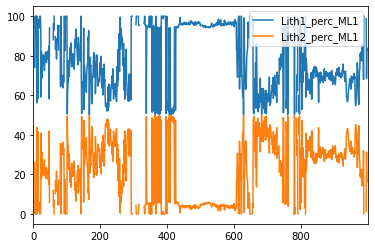

In [124]:
df_lith1lith2[['Lith1_perc_ML1', 'Lith2_perc_ML1']].iloc[:1000].plot()

# Lith1, Lith2 Coefficients

In [176]:
def compute_wo(lith_list, lith_coef_col, df):
    df_wo = df[lith_list + lith_coef_col + ['Wo_est', 'a', 'cutter_wear_area']]
    lith_coef = np.array([])
    for idx, row in df_wo.iterrows():
        lith_row = row[lith_list].values
        lith_coef_row = row[lith_coef_col].values
        check = lith_row * lith_coef_row
        check[check == 0] = np.mean(check)
        sum_row = np.sum(lith_row)
        if sum_row == 0: sum_row == 100
        lith_coef = np.append(lith_coef, np.sum(check/sum_row))
    df_wo['lith_coef'] = lith_coef
    df_wo.lith_coef.fillna(df_wo.lith_coef.mean(), inplace = True)
    Wo_act = df_wo.a * df_wo.lith_coef * np.sqrt(df_wo.cutter_wear_area) + 4
    df_wo['Wo_act'] = Wo_act
    return df_wo

def Wo_obj_func(lith_coef_val, df):
    org_lith_list = ['marl', 'coal', 'shale', 'silt', 'lime', 'sand']
    lith_coef_dict = dict(zip(org_lith_list, lith_coef_val))
    lith_list = ['Lith1_perc_ML1', 'Lith2_perc_ML1']
    lith_coef_col = ['Lith1_ML1_coef','Lith2_ML1_coef']
    df_copy = df.copy()
    df_copy['Lith1_ML1_coef'] = df_copy.Lith1_ML1
    df_copy['Lith2_ML1_coef'] = df_copy.Lith2_ML1
    df_copy.replace({'Lith1_ML1_coef':lith_coef_dict, 'Lith2_ML1_coef':lith_coef_dict}, inplace = True)
    lith_coef_col = ['Lith1_ML1_coef', 'Lith2_ML1_coef']
    
    df_wo = compute_wo(lith_list, lith_coef_col, df_copy)
    mse = mean_squared_error(df_wo['Wo_act'].values, df_wo['Wo_est'].values)
    return mse

# def Wo_obj_func(lith_coef_val, df):
#     lith_list = ['Lith1_perc_ML1', 'Lith2_perc_ML1']
#     lith_coef_dict = dict(zip(lith_list, lith_coef_val))
#     df_wo = compute_wo(lith_coef_dict, df)
#     mse = mean_squared_error(df_wo['Wo_act'].values, df_wo['Wo_est'].values)
#     return mse

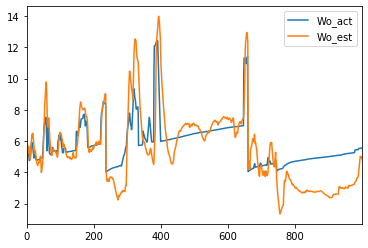

In [172]:
# lith_coef_val = [30.0, 5.0, 9.1, 15.0, 63.3, 31.0]
lith_coef_val = [30, 5.,5.146925, 15.,22.621503, 14.786531]
lith_list = ['marl', 'coal', 'shale', 'silt', 'lime', 'sand']
lith_coef_col = [s + '_coef' for s in lith_list]
lith_coef_dict = dict(zip(lith_list, lith_coef_val))
df_copy = df.copy()
df_copy = pd.concat([df_copy, pd.DataFrame(columns = lith_coef_col)])
df_copy[lith_coef_col] = lith_coef_val
df_copy.head()

df_wo = compute_wo(lith_list, lith_coef_col, df_copy.iloc[:1000])
df_wo[['Wo_act', 'Wo_est']].plot()

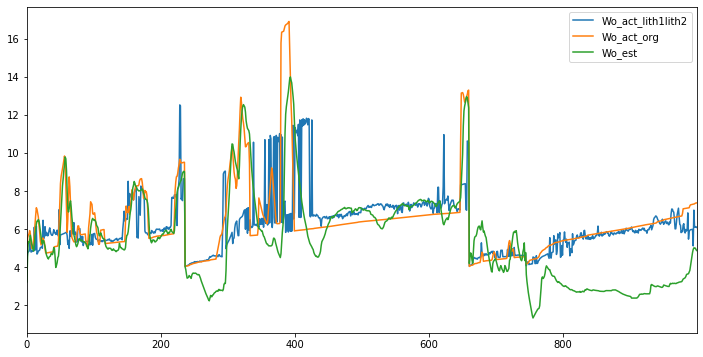

In [185]:
lith_coef_val = [30.0, 5.0, 9.1, 15.0, 63.3, 31.0]
lith_list = ['marl', 'coal', 'shale', 'silt', 'lime', 'sand']
lith_coef_dict = dict(zip(lith_list, lith_coef_val))
lith_list = ['Lith1_perc_ML1', 'Lith2_perc_ML1']
lith_coef_col = ['Lith1_ML1_coef','Lith2_ML1_coef']
df_copy = df_lith1lith2.copy()
# df_copy = pd.concat([df_lith1lith2.copy(), pd.DataFrame(columns = lith_coef_col)])
df_copy['Lith1_ML1_coef'] = df_copy.Lith1_ML1
df_copy['Lith2_ML1_coef'] = df_copy.Lith2_ML1
df_copy.replace({'Lith1_ML1_coef':lith_coef_dict, 'Lith2_ML1_coef':lith_coef_dict}, inplace = True)
df_copy[['Lith1_ML1', 'Lith2_ML1', 'Lith1_ML1_coef', 'Lith2_ML1_coef']].head()

df_wo = compute_wo(lith_list, lith_coef_col, df_copy.iloc[:1000])

fig = plt.figure(figsize = (12,6))
df_wo['Wo_act_org'] = df_lith1lith2['Wo_act']
df_wo['Wo_act_lith1lith2'] = df_wo['Wo_act']
df_wo[['Wo_act_lith1lith2', 'Wo_act_org', 'Wo_est']].plot(ax = fig.add_subplot(111))

In [193]:
lith_coef_init = [30.0, 5.0, 9.1, 15.0, 63.3, 31.0]
disp = True
optimization_Obj = minimize(Wo_obj_func, lith_coef_init, args=(df_lith1lith2.iloc[:3000]), method='SLSQP',
                            bounds = [(0.0,100.0)]*len(lith_coef_init),
                            options = {'maxiter': 100, 'disp': disp})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.307093769050064
            Iterations: 27
            Function evaluations: 222
            Gradient evaluations: 27


[3.000000e+01 5.000000e+00 1.255697e+01 5.173154e+00 2.033036e-16 3.024943e+01]


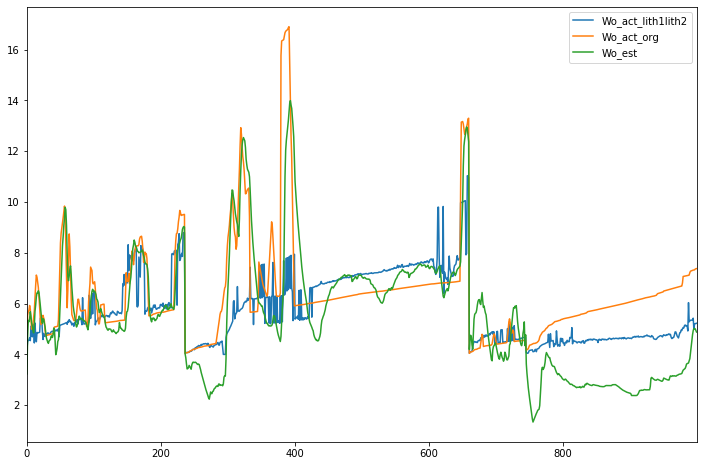

In [190]:
lith_coef_val = optimization_Obj.x
print(lith_coef_val)
lith_list = ['marl', 'coal', 'shale', 'silt', 'lime', 'sand']
lith_coef_dict = dict(zip(lith_list, lith_coef_val))
lith_list = ['Lith1_perc_ML1', 'Lith2_perc_ML1']
lith_coef_col = ['Lith1_ML1_coef','Lith2_ML1_coef']
df_copy = df_lith1lith2.copy()
# df_copy = pd.concat([df_lith1lith2.copy(), pd.DataFrame(columns = lith_coef_col)])
df_copy['Lith1_ML1_coef'] = df_copy.Lith1_ML1
df_copy['Lith2_ML1_coef'] = df_copy.Lith2_ML1
df_copy.replace({'Lith1_ML1_coef':lith_coef_dict, 'Lith2_ML1_coef':lith_coef_dict}, inplace = True)

df_wo = compute_wo(lith_list, lith_coef_col, df_copy.iloc[:1000])

fig = plt.figure(figsize = (12,8))
df_wo['Wo_act_org'] = df_lith1lith2['Wo_act']
df_wo['Wo_act_lith1lith2'] = df_wo['Wo_act']
df_wo[['Wo_act_lith1lith2', 'Wo_act_org', 'Wo_est']].plot(ax = fig.add_subplot(111))

In [181]:
df_copy[['Lith1_ML1', 'Lith2_ML1', 'Lith1_perc_ML1', 'Lith2_perc_ML1', 'Lith1_ML1_coef', 'Lith2_ML1_coef']].sample(10)

,Lith1_ML1,Lith2_ML1,Lith1_perc_ML1,Lith2_perc_ML1,Lith1_ML1_coef,Lith2_ML1_coef
6194,sand,silt,97.545235,2.454765,30.249426,5.173154e+00
27332,shale,sand,53.079053,46.920947,12.556974,3.024943e+01
18306,sand,silt,91.153899,8.846101,30.249426,5.173154e+00
17020,sand,lime,NaN,NaN,30.249426,2.033036e-16
17671,shale,lime,70.917456,29.082544,12.556974,2.033036e-16
16401,sand,silt,88.977485,11.022515,30.249426,5.173154e+00
6204,sand,silt,95.337744,4.662256,30.249426,5.173154e+00
10299,sand,shale,88.686672,11.313328,30.249426,1.255697e+01
16188,sand,shale,84.773241,15.226759,30.249426,1.255697e+01
20940,sand,silt,94.686951,5.313049,30.249426,5.173154e+00


,Lith1_ML1,Lith2_ML1,Lith1_perc_ML1,Lith2_perc_ML1,Lith1_ML1_coef,Lith2_ML1_coef
18039,shale,sand,57.611406,42.388594,12,9
3449,shale,silt,67.294259,32.705741,12,9
9340,shale,sand,100.000000,0.000000,12,9
25155,sand,shale,71.453047,28.546953,12,9
22340,sand,shale,76.121647,23.878353,12,9
10073,shale,lime,98.108299,1.891701,12,9
23877,sand,shale,84.785026,15.214974,12,9
20239,shale,silt,76.453440,23.546560,12,9
9053,sand,shale,65.178817,34.821183,12,9
13602,sand,shale,52.141897,47.858103,12,9


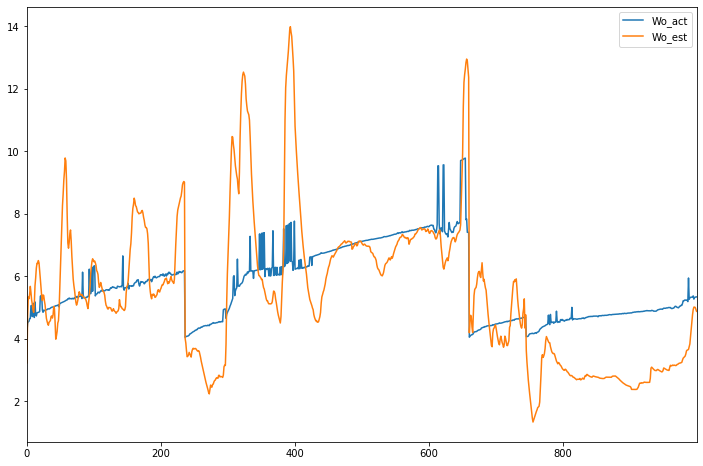

In [192]:
lith_list = ['Lith1_perc_ML1', 'Lith2_perc_ML1']
lith_coef_col = ['Lith1_ML1_coef','Lith2_ML1_coef']
df_copy = df_lith1lith2.copy()
# df_copy = pd.concat([df_lith1lith2.copy(), pd.DataFrame(columns = lith_coef_col)])
df_copy['Lith1_ML1_coef'] = 12
df_copy['Lith2_ML1_coef'] = 9
# df_copy.replace({'Lith1_ML1_coef':lith_coef_dict, 'Lith2_ML1_coef':lith_coef_dict}, inplace = True)
df_wo = compute_wo(lith_list, lith_coef_col, df_copy.iloc[:1000])
fig = plt.figure(figsize = (12,8))
df_wo[['Wo_act', 'Wo_est']].plot(ax = fig.add_subplot(111))
df_copy[['Lith1_ML1', 'Lith2_ML1', 'Lith1_perc_ML1', 'Lith2_perc_ML1', 'Lith1_ML1_coef', 'Lith2_ML1_coef']].sample(10)

In [198]:
import easydict

In [199]:
person = easydict()

TypeError: 'module' object is not callable